In [1]:
import pandas as pd
import numpy as np
import matplotlib
import numpy
import sklearn
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [46]:
df = pd.read_csv("/content/credit_card_dataset.csv")

In [47]:
AGE, GENDER, OCCUPATION, MARITIAL_STATUS, FAM_SIZE, INCOME, EXPENDITURE, USE_FREQ, LOAN_CAT, LOAN_AMOUNT, OVERDUE, DEBT_RECORD, RETURNED_CHEQUE, DISHONORED_BILL = "Age", "Gender", "Occupation", "Marital Status", "Family Size", "Income", "Expenditure", "Use Frequency", "Loan Category", "Loan Amount", "Overdue", " Debt Record", " Returned Cheque", " Dishonour of Bill"


features = [AGE, GENDER, OCCUPATION, MARITIAL_STATUS, FAM_SIZE, INCOME, EXPENDITURE, USE_FREQ, LOAN_CAT, LOAN_AMOUNT, OVERDUE, DEBT_RECORD, RETURNED_CHEQUE, DISHONORED_BILL]

customer_profiles = df[features] # Dataframe which holds the attributes that have potential

customer_profiles

,Age,Gender,Occupation,Marital Status,Family Size,Income,Expenditure,Use Frequency,Loan Category,Loan Amount,Overdue,Debt Record,Returned Cheque,Dishonour of Bill
0,30,MALE,BANK MANAGER,SINGLE,4,50000.0,22199.0,6,HOUSING,"10,00,000",5,"42,898",6,9
1,44,MALE,PROFESSOR,MARRIED,6,51000.0,19999.0,4,SHOPPING,"50,000",3,"33,999",1,5
2,30,FEMALE,DENTIST,SINGLE,3,58450.0,27675.0,5,TRAVELLING,"75,000",6,"20,876",3,1
3,29,MALE,TEACHER,MARRIED,5,45767.0,12787.0,3,GOLD LOAN,"6,00,000",7,"11,000",0,4
4,34,MALE,POLICE,SINGLE,4,43521.0,11999.0,3,AUTOMOBILE,"2,00,000",2,"43,898",1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,32,FEMALE,DIETICIAN,SINGLE,3,45060.0,24989.0,6,TRAVELLING,"400,085",6,41436,4,9
496,45,MALE,DRIVER,MARRIED,6,35838.0,19788.0,6,AGRICULTURE,"1,182,282",6,37338,9,3
497,50,FEMALE,TECHNICIAN,MARRIED,3,35938.0,21048.0,6,RESTAURANTS,"330,589",8,46120,4,8
498,42,MALE,BANK MANAGER,MARRIED,4,NaN,48072.0,9,GOLD LOAN,"729,793",6,51976,2,4


# **Preprocessing**

*   Drppoing Null values
*   Drppoing Duplicate values



In [48]:
df_cleaned = df.dropna()
df_cleaned

,Customer_ID,Age,Gender,Occupation,Marital Status,Family Size,Income,Expenditure,Use Frequency,Loan Category,Loan Amount,Overdue,Debt Record,Returned Cheque,Dishonour of Bill
0,IB14001,30,MALE,BANK MANAGER,SINGLE,4,50000.0,22199.0,6,HOUSING,"10,00,000",5,"42,898",6,9
1,IB14008,44,MALE,PROFESSOR,MARRIED,6,51000.0,19999.0,4,SHOPPING,"50,000",3,"33,999",1,5
2,IB14012,30,FEMALE,DENTIST,SINGLE,3,58450.0,27675.0,5,TRAVELLING,"75,000",6,"20,876",3,1
3,IB14018,29,MALE,TEACHER,MARRIED,5,45767.0,12787.0,3,GOLD LOAN,"6,00,000",7,"11,000",0,4
4,IB14022,34,MALE,POLICE,SINGLE,4,43521.0,11999.0,3,AUTOMOBILE,"2,00,000",2,"43,898",1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,IB15095,53,FEMALE,SOFTWARE ENGINEER,SINGLE,4,75210.0,26027.0,7,HOUSING,"740,375",7,35419,2,4
495,IB15097,32,FEMALE,DIETICIAN,SINGLE,3,45060.0,24989.0,6,TRAVELLING,"400,085",6,41436,4,9
496,IB15099,45,MALE,DRIVER,MARRIED,6,35838.0,19788.0,6,AGRICULTURE,"1,182,282",6,37338,9,3
497,IB15102,50,FEMALE,TECHNICIAN,MARRIED,3,35938.0,21048.0,6,RESTAURANTS,"330,589",8,46120,4,8


In [49]:
duplicates = df_cleaned.duplicated(keep=False)

# Filter the DataFrame to keep only unique rows
df_unique = df_cleaned[~duplicates]

print("\nDataFrame after dropping all duplicates:")
df_unique


DataFrame after dropping all duplicates:


,Customer_ID,Age,Gender,Occupation,Marital Status,Family Size,Income,Expenditure,Use Frequency,Loan Category,Loan Amount,Overdue,Debt Record,Returned Cheque,Dishonour of Bill
0,IB14001,30,MALE,BANK MANAGER,SINGLE,4,50000.0,22199.0,6,HOUSING,"10,00,000",5,"42,898",6,9
1,IB14008,44,MALE,PROFESSOR,MARRIED,6,51000.0,19999.0,4,SHOPPING,"50,000",3,"33,999",1,5
2,IB14012,30,FEMALE,DENTIST,SINGLE,3,58450.0,27675.0,5,TRAVELLING,"75,000",6,"20,876",3,1
3,IB14018,29,MALE,TEACHER,MARRIED,5,45767.0,12787.0,3,GOLD LOAN,"6,00,000",7,"11,000",0,4
4,IB14022,34,MALE,POLICE,SINGLE,4,43521.0,11999.0,3,AUTOMOBILE,"2,00,000",2,"43,898",1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,IB15095,53,FEMALE,SOFTWARE ENGINEER,SINGLE,4,75210.0,26027.0,7,HOUSING,"740,375",7,35419,2,4
495,IB15097,32,FEMALE,DIETICIAN,SINGLE,3,45060.0,24989.0,6,TRAVELLING,"400,085",6,41436,4,9
496,IB15099,45,MALE,DRIVER,MARRIED,6,35838.0,19788.0,6,AGRICULTURE,"1,182,282",6,37338,9,3
497,IB15102,50,FEMALE,TECHNICIAN,MARRIED,3,35938.0,21048.0,6,RESTAURANTS,"330,589",8,46120,4,8


In [6]:
df_unique.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,449.0,40.964365,10.264083,21.0,31.0,42.0,50.0,60.0
Family Size,449.0,4.518931,1.564170,2.0,3.0,4.0,6.0,7.0
Income,449.0,68865.351893,88517.998985,28366.0,45213.0,55999.0,73656.0,930000.0
Expenditure,449.0,27504.463252,10338.143275,9000.0,19870.0,25605.0,33541.0,62541.0
Use Frequency,449.0,5.291759,2.083513,2.0,4.0,5.0,7.0,9.0
Overdue,449.0,4.928731,2.536219,1.0,3.0,5.0,7.0,9.0
Returned Cheque,449.0,4.084633,2.834255,0.0,2.0,4.0,7.0,9.0
Dishonour of Bill,449.0,4.309577,2.595484,0.0,2.0,4.0,6.0,9.0


In [7]:
df_unique.describe()

,Age,Family Size,Income,Expenditure,Use Frequency,Overdue,Returned Cheque,Dishonour of Bill
count,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000
mean,40.964365,4.518931,68865.351893,27504.463252,5.291759,4.928731,4.084633,4.309577
std,10.264083,1.564170,88517.998985,10338.143275,2.083513,2.536219,2.834255,2.595484
min,21.000000,2.000000,28366.000000,9000.000000,2.000000,1.000000,0.000000,0.000000
25%,31.000000,3.000000,45213.000000,19870.000000,4.000000,3.000000,2.000000,2.000000
50%,42.000000,4.000000,55999.000000,25605.000000,5.000000,5.000000,4.000000,4.000000
75%,50.000000,6.000000,73656.000000,33541.000000,7.000000,7.000000,7.000000,6.000000
max,60.000000,7.000000,930000.000000,62541.000000,9.000000,9.000000,9.000000,9.000000


In [9]:
print(df_unique.dtypes)

Customer_ID            object
Age                     int64
Gender                 object
Occupation             object
Marital Status         object
Family Size             int64
Income                float64
Expenditure           float64
Use Frequency           int64
Loan Category          object
Loan Amount            object
Overdue                 int64
 Debt Record           object
 Returned Cheque        int64
 Dishonour of Bill      int64
dtype: object


In [10]:
numeric_df = df_unique.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                         Age  Family Size    Income  Expenditure  \
Age                 1.000000     0.090970  0.023684     0.087600   
Family Size         0.090970     1.000000 -0.065511     0.029208   
Income              0.023684    -0.065511  1.000000     0.018752   
Expenditure         0.087600     0.029208  0.018752     1.000000   
Use Frequency      -0.043038     0.070561  0.103222     0.002862   
Overdue            -0.137892    -0.121195 -0.001554     0.073221   
 Returned Cheque    0.080823     0.097317 -0.035875    -0.039617   
 Dishonour of Bill  0.009380    -0.076497 -0.006952    -0.031480   

                    Use Frequency   Overdue   Returned Cheque  \
Age                     -0.043038 -0.137892          0.080823   
Family Size              0.070561 -0.121195          0.097317   
Income                   0.103222 -0.001554         -0.035875   
Expenditure              0.002862  0.073221         -0.039617   
Use Frequency            1.000000  0.1517

# **Feature Engineering**

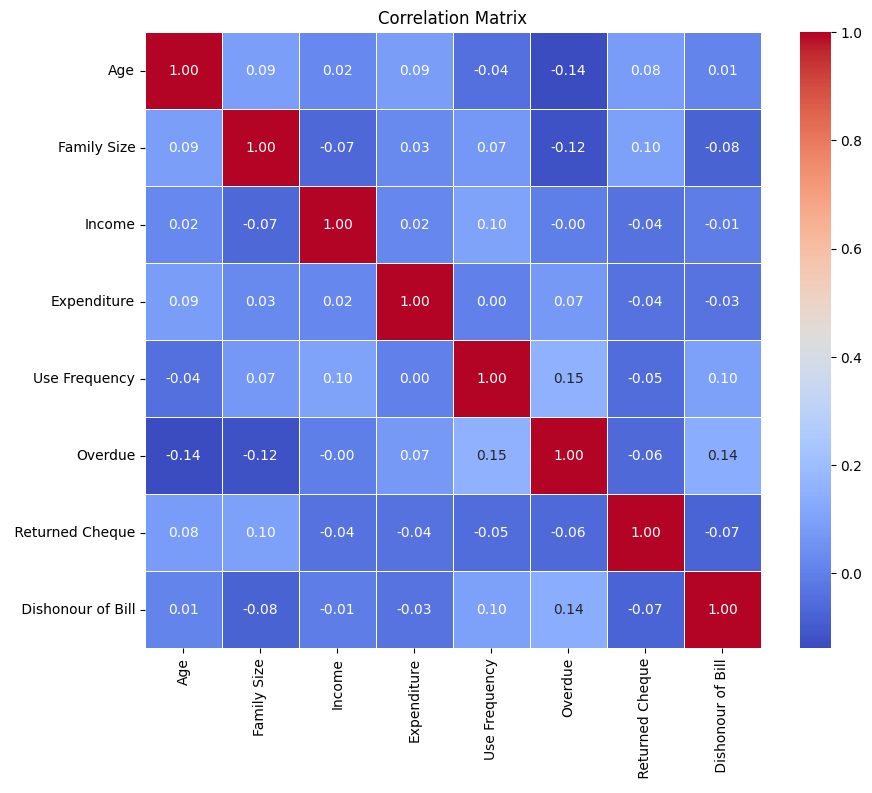

In [11]:
import seaborn as sns
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, linewidths=.5)

# Add title to the heatmap
plt.title('Correlation Matrix')

# Show the plot
plt.show()

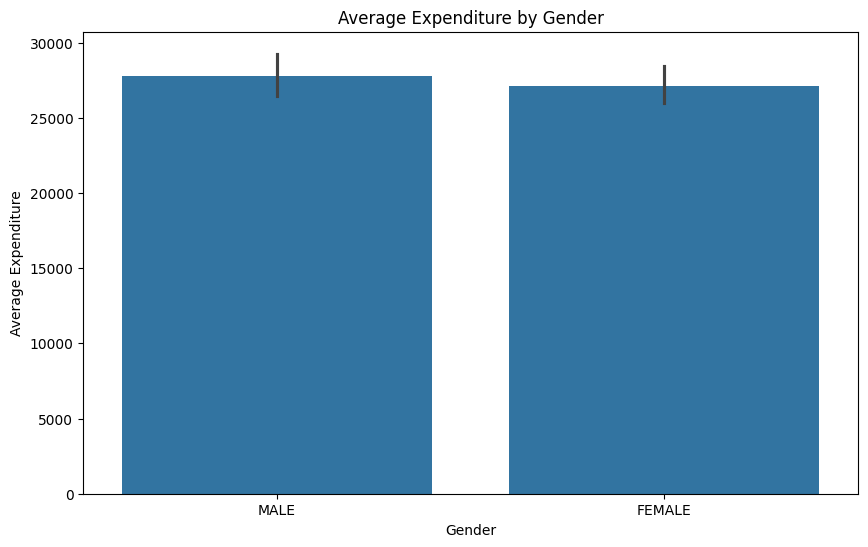

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Expenditure', data=df_unique, estimator='mean')
plt.title('Average Expenditure by Gender')
plt.ylabel('Average Expenditure')
plt.xlabel('Gender')
plt.show()

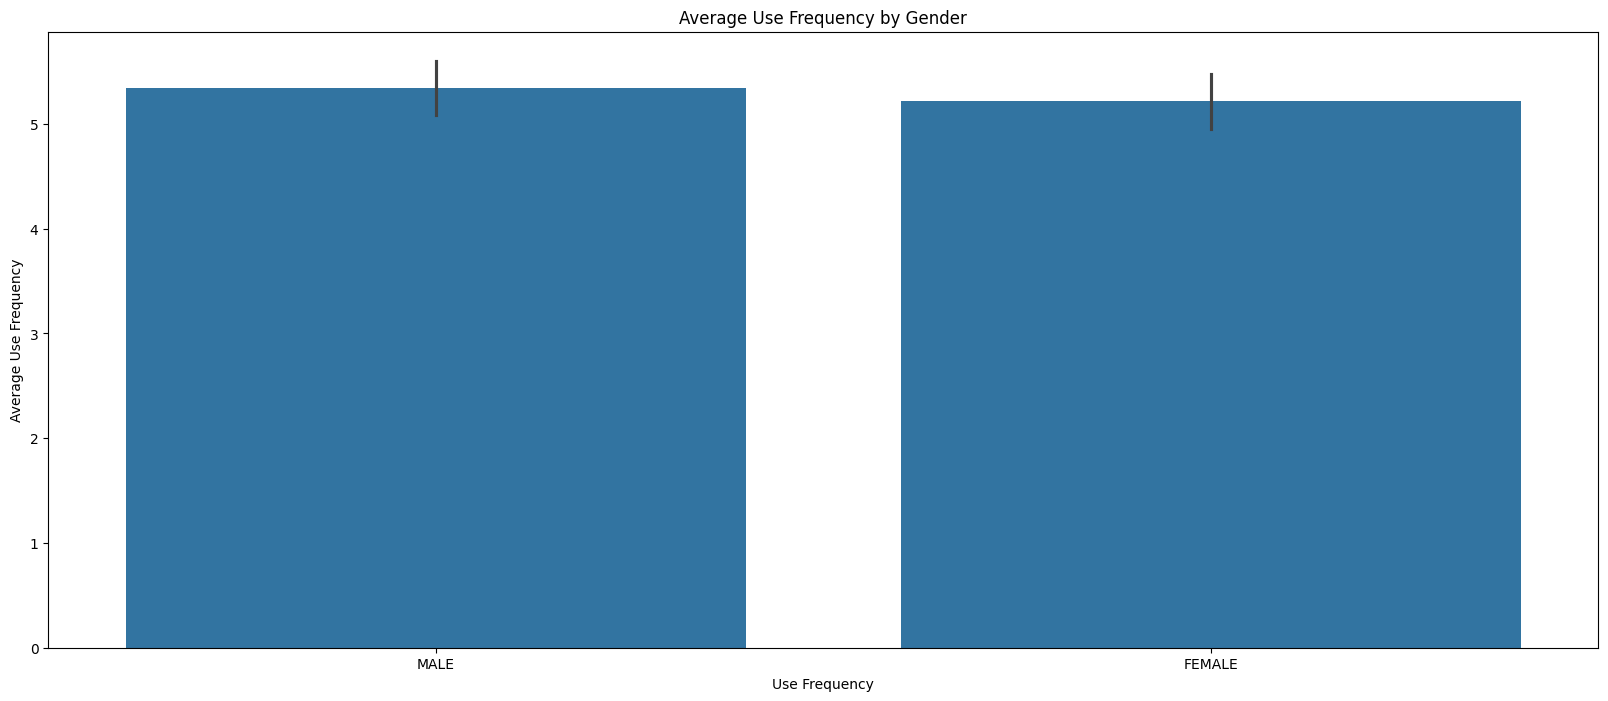

In [13]:
plt.figure(figsize=(20, 8))
sns.barplot(x='Gender', y='Use Frequency', data=df_unique,  estimator='mean')
plt.title('Average Use Frequency by Gender')
plt.ylabel('Average Use Frequency')
plt.xlabel('Use Frequency')
plt.show()

# **Impact on frequency of credit card usage by Occupation**

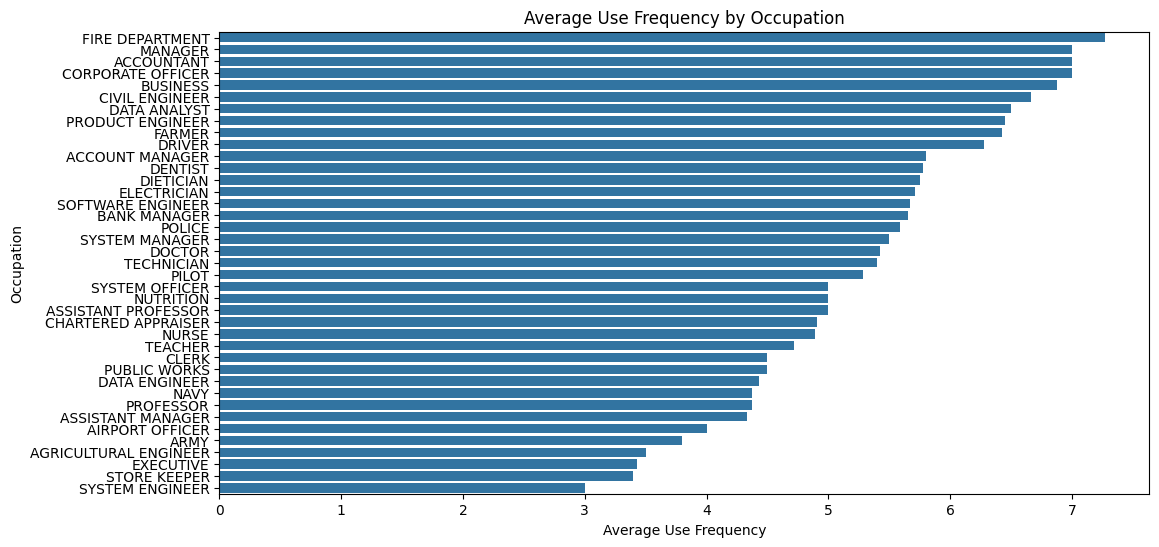

In [14]:
# Group data by Occupation and calculate the mean use frequency
occupation_grouped = df_unique.groupby('Occupation')['Use Frequency'].mean().reset_index()

# Sort by Use Frequency for better visualization
occupation_grouped = occupation_grouped.sort_values(by='Use Frequency', ascending=False)

# Horizontal bar plot with aggregated data
plt.figure(figsize=(12, 6))
sns.barplot(y='Occupation', x='Use Frequency', data=occupation_grouped)
plt.title('Average Use Frequency by Occupation')
plt.xlabel('Average Use Frequency')
plt.ylabel('Occupation')
plt.show()

# **Impact on Overdue of credit card paymaent by Occupation**

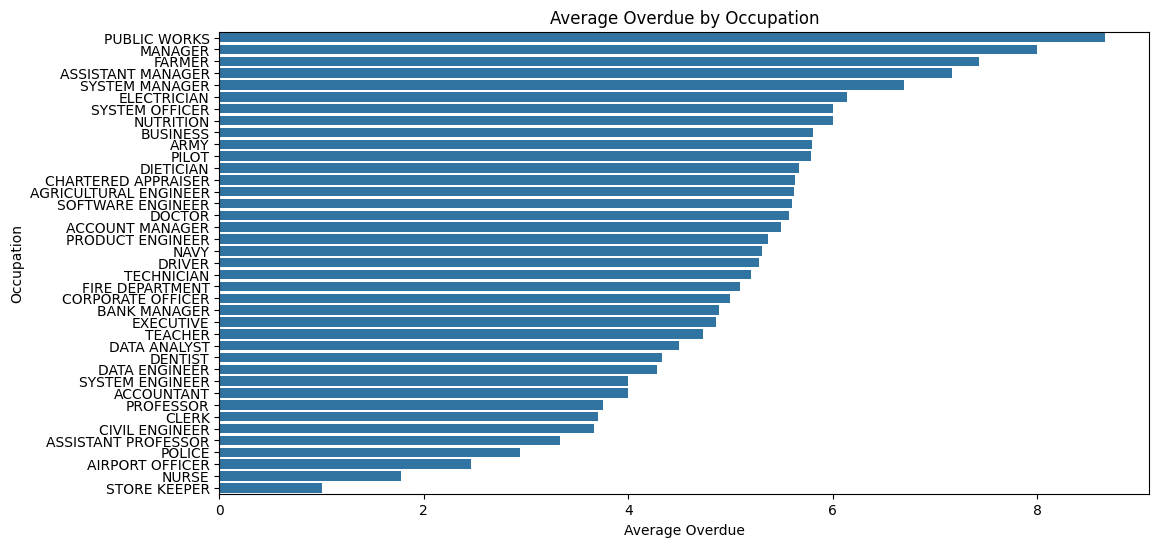

In [15]:
# Group data by Occupation and calculate the mean use frequency
occupation_grouped = df_unique.groupby('Occupation')['Overdue'].mean().reset_index()

# Sort by Use Frequency for better visualization
occupation_grouped = occupation_grouped.sort_values(by='Overdue', ascending=False)

# Horizontal bar plot with aggregated data
plt.figure(figsize=(12, 6))
sns.barplot(y='Occupation', x='Overdue', data=occupation_grouped)
plt.title('Average Overdue by Occupation')
plt.xlabel('Average Overdue')
plt.ylabel('Occupation')
plt.show()

In [23]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# Assuming you have prepared your data (X) and target variable (y) here...

df_unique['Occupation'] = df_unique['Occupation'].astype('category')

# Prepare data
X = df_unique[['Occupation', 'Overdue']]  # Independent variable
y = df_unique['Overdue']  # Dependent variable

X = pd.get_dummies(X, columns=['Occupation'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost regressor
model = xgb.XGBRegressor()

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 4.956442328168325e-09


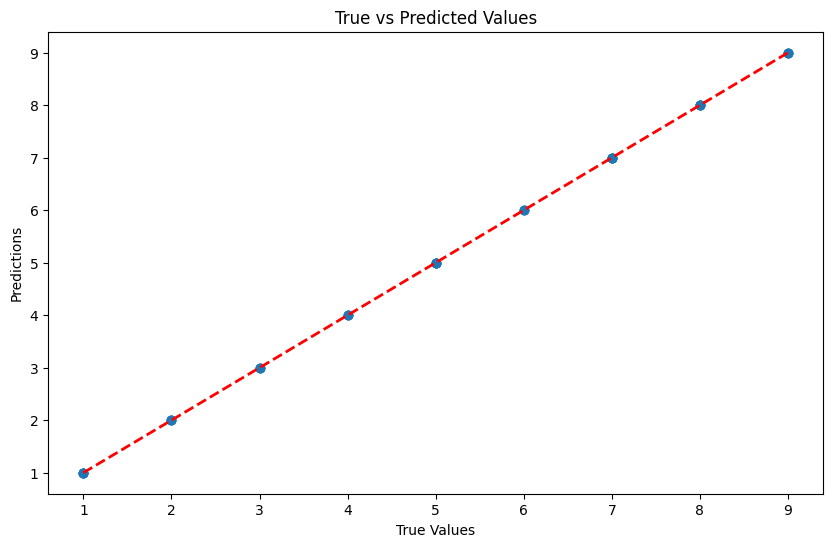

In [24]:
import matplotlib.pyplot as plt

# Scatter plot of true vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()

# **Occupation impacts the overdue and which professions has highest overdue**

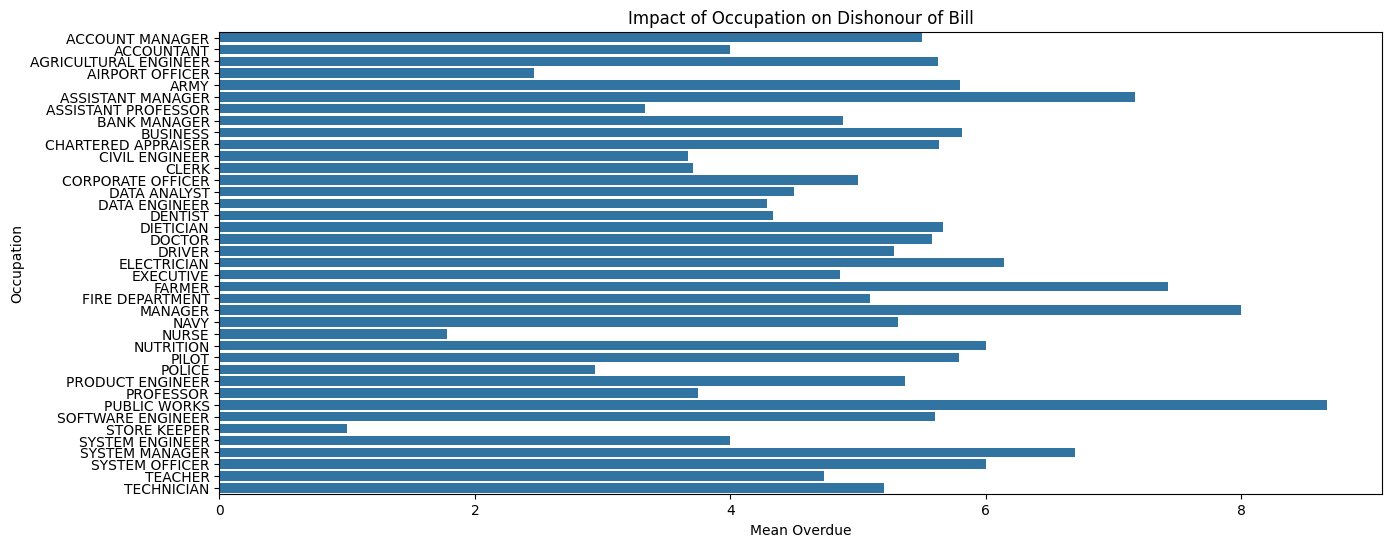

In [64]:
impact_analysis = df_unique.groupby('Occupation')['Overdue'].mean().reset_index()

# Plot the impact analysis
plt.figure(figsize=(15, 6))
sns.barplot(x='Overdue', y='Occupation', data=impact_analysis)
plt.title('Impact of Occupation on Dishonour of Bill')
plt.xlabel('Mean Overdue')
plt.ylabel('Occupation')
plt.show()

In [50]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# Assuming you have prepared your data (X) and target variable (y) here...

df_unique['Loan Category'] = df_unique['Loan Category'].astype('category')



# Prepare data
X = df_unique[['Loan Category', ' Dishonour of Bill']]  # Independent variable
y = df_unique[' Dishonour of Bill']  # Dependent variable

X = pd.get_dummies(X, columns=['Loan Category'])


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost regressor
model = xgb.XGBRegressor()

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 2.8639378928444188e-09


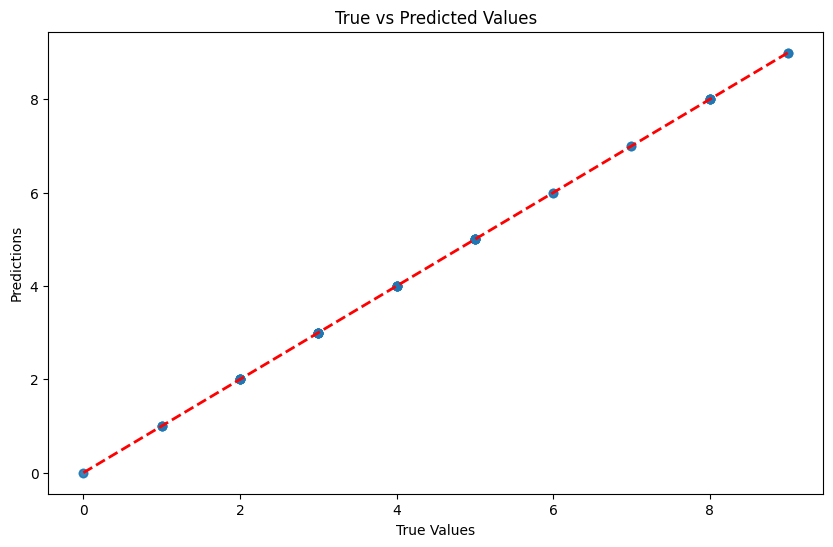

In [51]:
import matplotlib.pyplot as plt

# Scatter plot of true vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()

# **Loan Category impacts the overdue and which category can cause most defaulters**

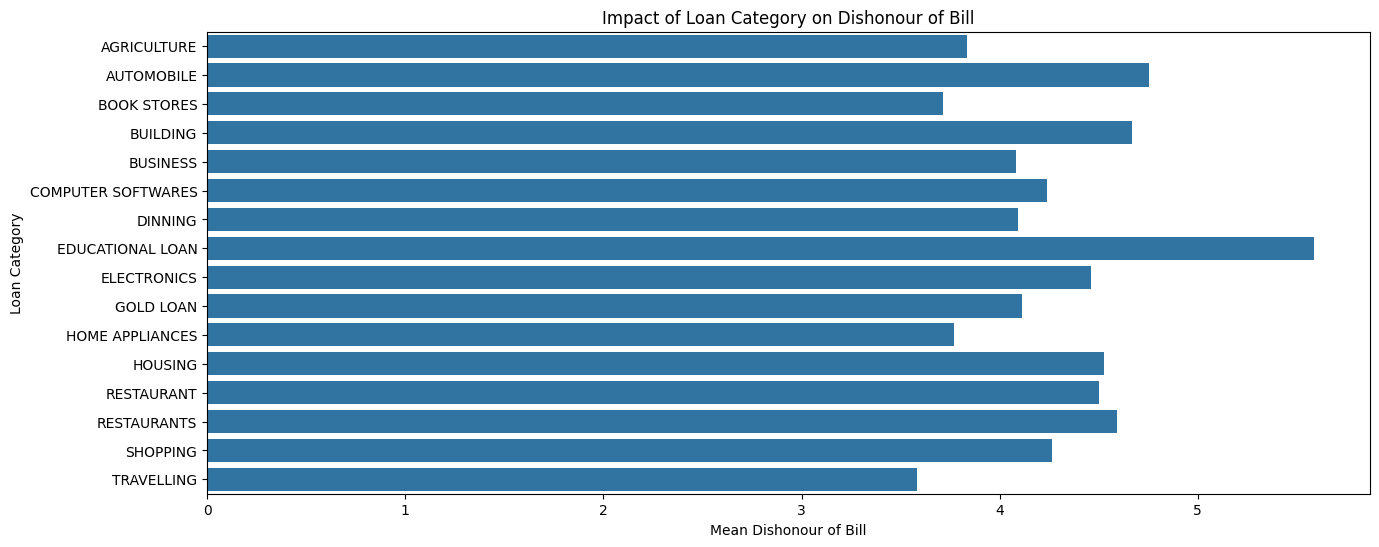

In [63]:
impact_analysis = df_unique.groupby('Loan Category')[' Dishonour of Bill'].mean().reset_index()

# Plot the impact analysis
plt.figure(figsize=(15, 6))
sns.barplot(x=' Dishonour of Bill', y='Loan Category', data=impact_analysis)
plt.title('Impact of Loan Category on Dishonour of Bill')
plt.xlabel('Mean Dishonour of Bill')
plt.ylabel('Loan Category')
plt.show()